<h1 style = "text-align: center;"> Project Title
</h1>
<h1 style = "text-align: center;">Natural Language Processing(NLP) - Sentiment_Analysis</h1>

## Aim -<h2 style="font-weight: normal">The objective of this analysis is to understand human emotion when they write a product review. If they have positive, neutral, or negetive emotions about the products they have purchased. These type of analysis can then be used to improve the customer servises.</h2>
## Data -<h2 style="font-weight: normal">The data that is consdered over here is the amazon-food-reviews data. Which is availble on kaggle.</h2>
## Result -<h2 style="font-weight: normal">The expected result is a comparison between 2 models and there performance.</h2>

# The Process of NLP and the use of NLTK
# What is NLP?
NLP stands for Natural Language Processing. Its a branch of Artificial Intelligence (AI) that provides any computer the power to process Human Natural lanagage as its own, pretending to understand the natural way any human will comunicate.
<br>
### Wheather it is:
- Speach based
- expression based
- sentiments based
- emotion based (more for a future based approch)
- translate text from one language to another
- respond to typed or spoken commands
- recognize or authenticate users based on voice
- summarize large volumes of text
- assess the intent or sentiment of text or speech generate text or graphics or other content on demand
### It achive this by the use of NLTK (Natural Language Tool Kit).
- Tokenization is the first step -> In thwe are basicaly taking the text data and telling the computer to seprate each word from the text as a token. So that it can be further analysed.
- Part Of Speach (POS) -> Here what we are doing is telling the computer to define the POS of each token
- Grouping of the data for further analysis.

#### __* Note to remember is__ These are the basic steps for the given text whereas there are libraries presnt to perform similar tasks on a major scale i.e. for the entire data set. Such as Vader and Roberto.
### The Process of NLP:
(
- __Stemming and lemmatization:__ Stemming is an informal process of converting words to their base forms using heuristic rules. For example, “university,” “universities,” and “university’s” might all be mapped to the base univers. (One limitation in this approach is that “universe” may also be mapped to univers, even though universe and university don’t have a close semantic relationship.) Lemmatization is a more formal way to find roots by analyzing a word’s morphology using vocabulary from a dictionary. Stemming and lemmatization are provided by libraries like spaCy and NLTK.
- __Sentence segmentation:__ breaks a large piece of text into linguistically meaningful sentence units. This is obvious in languages like English, where the end of a sentence is marked by a period, but it is still not trivial. A period can be used to mark an abbreviation as well as to terminate a sentence, and in this case, the period should be part of the abbreviation token itself. The process becomes even more complex in languages, such as ancient Chinese, that don’t have a delimiter that marks the end of a sentence.
- __Stop word removal:__ aims to remove the most commonly occurring words that don’t add much information to the text. For example, “the,” “a,” “an,” and so on.
- __Tokenization:__ splits text into individual words and word fragments. The result generally consists of a word index and tokenized text in which words may be represented as numerical tokens for use in various deep learning methods. A method that instructs language models to ignore unimportant tokens can improve efficiency.

__Source of Info:__ https://www.deeplearning.ai/resources/natural-language-processing/

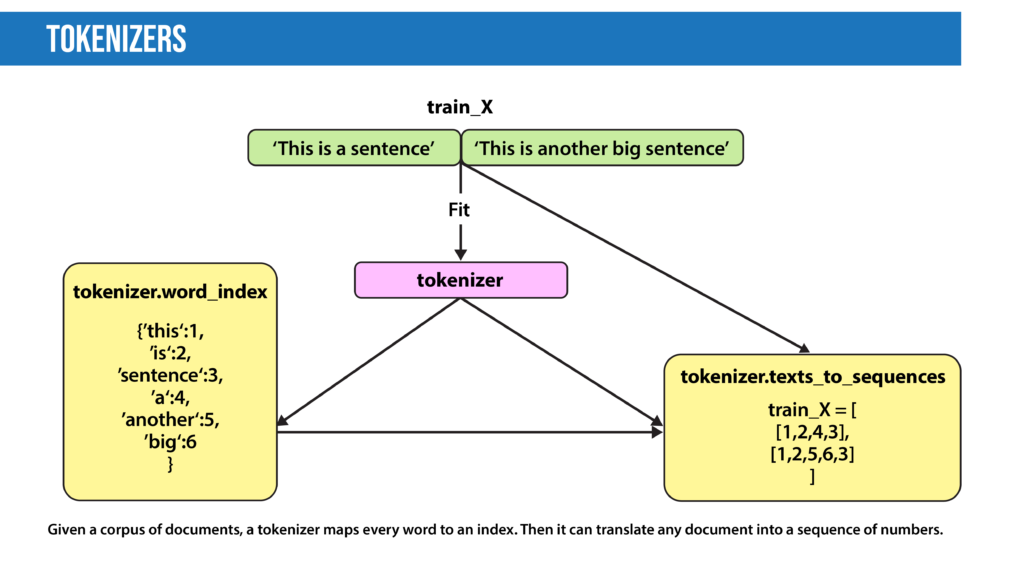

)
### Starting with segmentation of the given text. As we know that our main objective is the understand the sentiments or the emotions of the people behind writing these reviews

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
import warnings
warnings.simplefilter('ignore')

[nltk_data] Downloading package vader_lexicon to C:\Users\Jeetendra

[nltk_data]     singh\AppData\Roaming\nltk_data...

[nltk_data]   Package vader_lexicon is already up-to-date!

[nltk_data] Downloading package punkt to C:\Users\Jeetendra

[nltk_data]     singh\AppData\Roaming\nltk_data...

[nltk_data]   Package punkt is already up-to-date!

[nltk_data] Downloading package averaged_perceptron_tagger to

[nltk_data]     C:\Users\Jeetendra singh\AppData\Roaming\nltk_data...

[nltk_data]   Package averaged_perceptron_tagger is already up-to-

[nltk_data]       date!

[nltk_data] Downloading package maxent_ne_chunker to

[nltk_data]     C:\Users\Jeetendra singh\AppData\Roaming\nltk_data...

[nltk_data]   Package maxent_ne_chunker is already up-to-date!

[nltk_data] Downloading package words to C:\Users\Jeetendra

[nltk_data]     singh\AppData\Roaming\nltk_data...

[nltk_data]   Package words is already up-to-date!


### Please note the we have to dounload certain packages inorder to successfully run the sentiment analysis. So do worry about the red highlight above.

In [20]:
# Reading the complete dataset
df = pd.read_csv(r'D:/desktop/food/Reviews.csv')

# The info of the complete dataset for your understanding of what actually the dataset look like
    |Info                                   |
    |---------------------------------------|
    |<class 'pandas.core.frame.DataFrame'>  |
    |RangeIndex: 568454 entries, 0 to 568453|
    |Data columns (total 10 columns):       |


    |S.no|Column                   |Non-Null Count   Dtype   |
    |----|-------------------------|-------------------------| 
    |0   |  Id                     | 568454 non-null  int64  |
    |1   | ProductId               | 568454 non-null  object |
    |2   | UserId                  | 568454 non-null  object |
    |3   | ProfileName             | 568438 non-null  object |
    |4   | HelpfulnessNumerator    | 568454 non-null  int64  |
    |5   | HelpfulnessDenominator  | 568454 non-null  int64  |
    |6   | Score                   | 568454 non-null  int64  |
    |7   | Time                    | 568454 non-null  int64  |
    |8   | Summary                 | 568427 non-null  object |
    |9   | Text                    | 568454 non-null  object | 

    |dtypes: int64(5), object(5)|
    |memory usage: 43.4+ MB     |

## But we are going to take only first 1000 rows of data for our analysis. As we are working on Personal computer and we will be making use of the CPU instead of the GPU for our NLP sentiment analysis later on in the notebook.

In [21]:
# Small DataFrame for our use.
df = df.head(1000)
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1000 entries, 0 to 999

Data columns (total 10 columns):

 #   Column                  Non-Null Count  Dtype 

---  ------                  --------------  ----- 

 0   Id                      1000 non-null   int64 

 1   ProductId               1000 non-null   object

 2   UserId                  1000 non-null   object

 3   ProfileName             1000 non-null   object

 4   HelpfulnessNumerator    1000 non-null   int64 

 5   HelpfulnessDenominator  1000 non-null   int64 

 6   Score                   1000 non-null   int64 

 7   Time                    1000 non-null   int64 

 8   Summary                 1000 non-null   object

 9   Text                    1000 non-null   object

dtypes: int64(5), object(5)

memory usage: 78.2+ KB


# Performing EDA to check what does the data look likes

In [97]:
# Lets display our Dataset 
df.head()

,Id,ProductId,UserId,ProfileName,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...


In [98]:
# Lets check if there is any null values in the dataset.
df.isna().count()

Id             1000
ProductId      1000
UserId         1000
ProfileName    1000
Score          1000
Summary        1000
Text           1000
dtype: int64

In [99]:
#let see what does the text data look like, choose any random Index value.
df['Text'].values[20]

"My husband is a Twizzlers addict.  We've bought these many times from Amazon because we're government employees living overseas and can't get them in the country we are assigned to.  They've always been fresh and tasty, packed well and arrive in a timely manner."

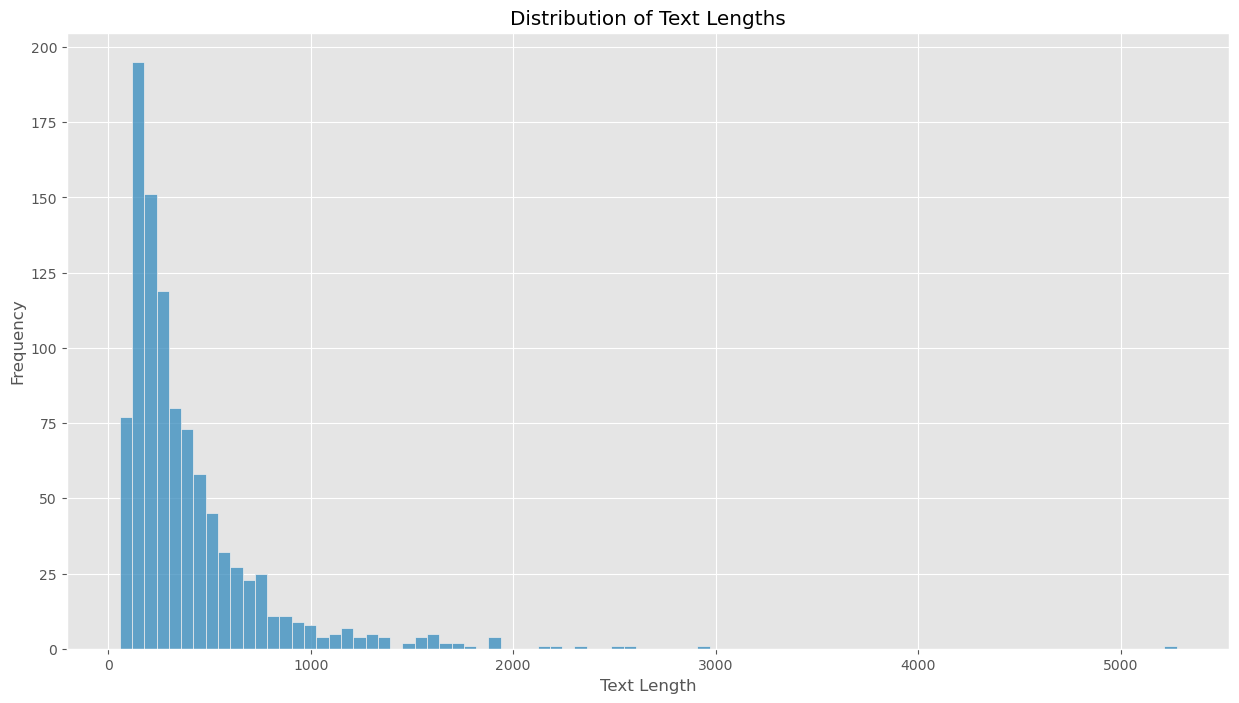

In [115]:
# lets performe some text analysis

# Lets Compute the length of each text entry
text_lengths = df['Text'].str.len()

fig, ax = plt.subplots(figsize=(15, 8))

# Lets Create a histogram using Seaborn
sns.histplot(text_lengths)


# Lets Add labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')

# Show the plot
plt.show()

### The above graph shows text length distribution ranges from 0-5000 with corresponding frequencies of 200-75. Frequencies of 75 or less have text lengths ranging from 75-5000. The frequency range for text lengths 0-1000 is 200-75.

In [28]:
# lets Check out the smallest and the largest review
reviews = df['Text']
smallest_rev = None
smallest_len = float('inf')
smallest_index = None

for index, review in enumerate(reviews):
    rev_len = len(review)
    if rev_len < smallest_len:
        smallest_len = rev_len
        smallest_rev = review
        smallest_index = index
print(smallest_index)

largest_rev = None
largest_len = 0
largest_index = None

for index, review in enumerate(reviews):
    rev_len = len(review)
    if rev_len > largest_len:
        largest_len = rev_len
        largest_rev = review
        largest_index = index
        
print(largest_index)
# df['Text'].idxmin()
# smallest_rev

74

539


In [111]:
# lets see how these reviews look like
print(df['Text'][74])
# print(df['Text'][539]) This is really a very big text review. Hence no need to print it. 

It is okay.  I would not go out of my way to buy it again


Text(0, 0.5, 'Review')

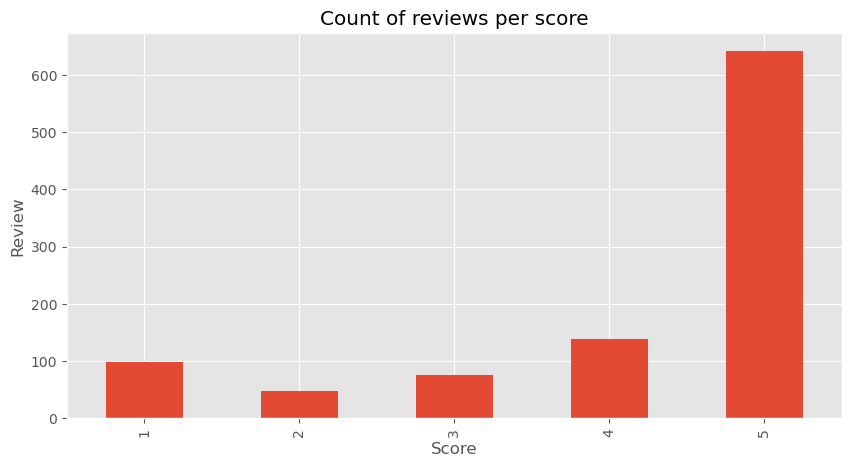

In [25]:
# lets check out score vs review . How many reviews are there for each score
fig1 = df['Score'].value_counts().sort_index()\
.plot(kind = 'bar', figsize = (10,5), title = 'Count of reviews per score')
fig1.set_xlabel('Score')
fig1.set_ylabel('Review')

# The above graph shows that our most of the data has a score value of 5. Post this lets work on the NLTK stuff.

### So for our analysis the most important columns so far observed are Id, ProductId, UserId, ProfileName, Score, Summary, and Text. Remaining columns can be droped i.e. HelpfulnessNumerator, HelpfulnessDenominator, Time. As they are not solving any perpose as of now for the sentiment analysis

In [26]:
# Dropping non reqired colomns

df = df.drop(['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time'], axis = 1)

In [27]:
df.head()

,Id,ProductId,UserId,ProfileName,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...


In [116]:
# Lets check how the tokenization acutally works. SO to achve this lets take our smallest review as an exmaple

example = df['Text'][74]
print(example)

It is okay.  I would not go out of my way to buy it again


In [31]:
token = nltk.word_tokenize(example)
token

['It',
 'is',
 'okay',
 '.',
 'I',
 'would',
 'not',
 'go',
 'out',
 'of',
 'my',
 'way',
 'to',
 'buy',
 'it',
 'again']

In [32]:
# Next let che check the Part of Speach for the same
pos_tag = nltk.pos_tag(token)
pos_tag

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('okay', 'JJ'),
 ('.', '.'),
 ('I', 'PRP'),
 ('would', 'MD'),
 ('not', 'RB'),
 ('go', 'VB'),
 ('out', 'IN'),
 ('of', 'IN'),
 ('my', 'PRP$'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('buy', 'VB'),
 ('it', 'PRP'),
 ('again', 'RB')]

In [33]:
# Now we will put these into chunks for better visibility
entity = nltk.chunk.ne_chunk(pos_tag)
entity.pprint()

(S

  It/PRP

  is/VBZ

  okay/JJ

  ./.

  I/PRP

  would/MD

  not/RB

  go/VB

  out/IN

  of/IN

  my/PRP$

  way/NN

  to/TO

  buy/VB

  it/PRP

  again/RB)


# Now I think we are ready to start our Sentiment analysis on the entire selected dataset

In [117]:
# Calling the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

In [118]:
# testing the SIA for polarity score using our example text
sia.polarity_scores("example")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [36]:
# polarity score for the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [120]:
# We will call this Polarity score result and convert it into a DataFrame as Vader.
# AS we are performing the first method of analysis with vader module
vader = pd.DataFrame(res).T
vader = vader.reset_index().rename(columns = {'index':'Id'})
vader = vader.merge(df, how = "left")

In [38]:
vader.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,Score,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...


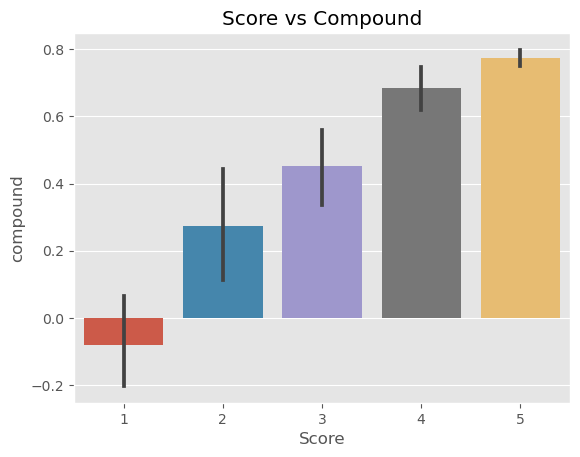

In [39]:
# lets plot the score vs compund value to see what does the data look like

fig2 = sns.barplot(data = vader, x = 'Score', y = 'compound')
fig2.set_title('Score vs Compound')
plt.show()

## The above plot does show that the higher the score more positive the compound value is .

## Let plot the positive neutral and the negative results sepratle, to see how does the data look like.

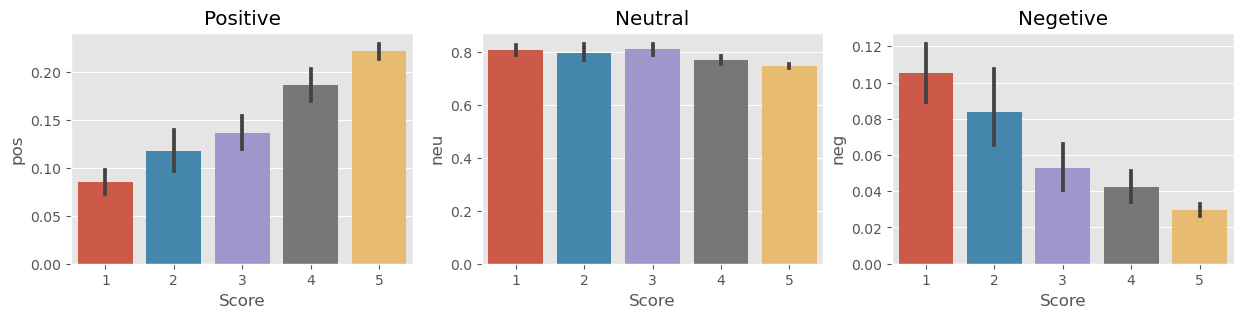

In [55]:
# now lets plot all the 3 pos , neg, neu ot see the distribution of the data
fig, fig3 = plt.subplots(1,3, figsize = (15,3))
sns.barplot(data = vader, x = 'Score', y = 'pos', ax= fig3[0])
sns.barplot(data = vader, x = 'Score', y = 'neu', ax= fig3[1])
sns.barplot(data = vader, x = 'Score', y = 'neg', ax= fig3[2])
fig3[0].set_title('Positive')
fig3[1].set_title('Neutral')
fig3[2].set_title('Negetive')
plt.show()

## Vader is valuable and is a fantastic method to understand the general form of sentiments.

## Let's work out a more comprihensive model to understand the same analysis in a more complex and detailed manner.
### _Next is roberta by hugging face which is a more complex model to work arround withits pipeline and transformetivity capabilities._

In [41]:
# Lets try roberta for the same. Roberta begins here.

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [42]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [43]:
# steps for running the text on roberta model
# encoding

encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)

scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2],
}
print(scores_dict)

{'roberta_neg': 0.13885969, 'roberta_neu': 0.532056, 'roberta_pos': 0.32908437}


In [44]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict

In [45]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename,**roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for Id{myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for Id83

Broke for Id187

Broke for Id529

Broke for Id540

Broke for Id746

Broke for Id863


In [47]:
# next is lets rename the neg pos neu to vader neg pos and neu respectively and roberta neg pos and neu similarly

final_df = pd.DataFrame(res).T
final_df = final_df.reset_index().rename(columns = {'index':'Id'})
final_df = final_df.merge(df, how = "left")

In [171]:
# Please note that this is the combined DataFrame of all the sentiment paramenters. Hence we can consider this as roberta df also.
final_df.head(3)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,Score,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098068,0.898703,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...


In [170]:
final_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'Score', 'Summary', 'Text'],
      dtype='object')

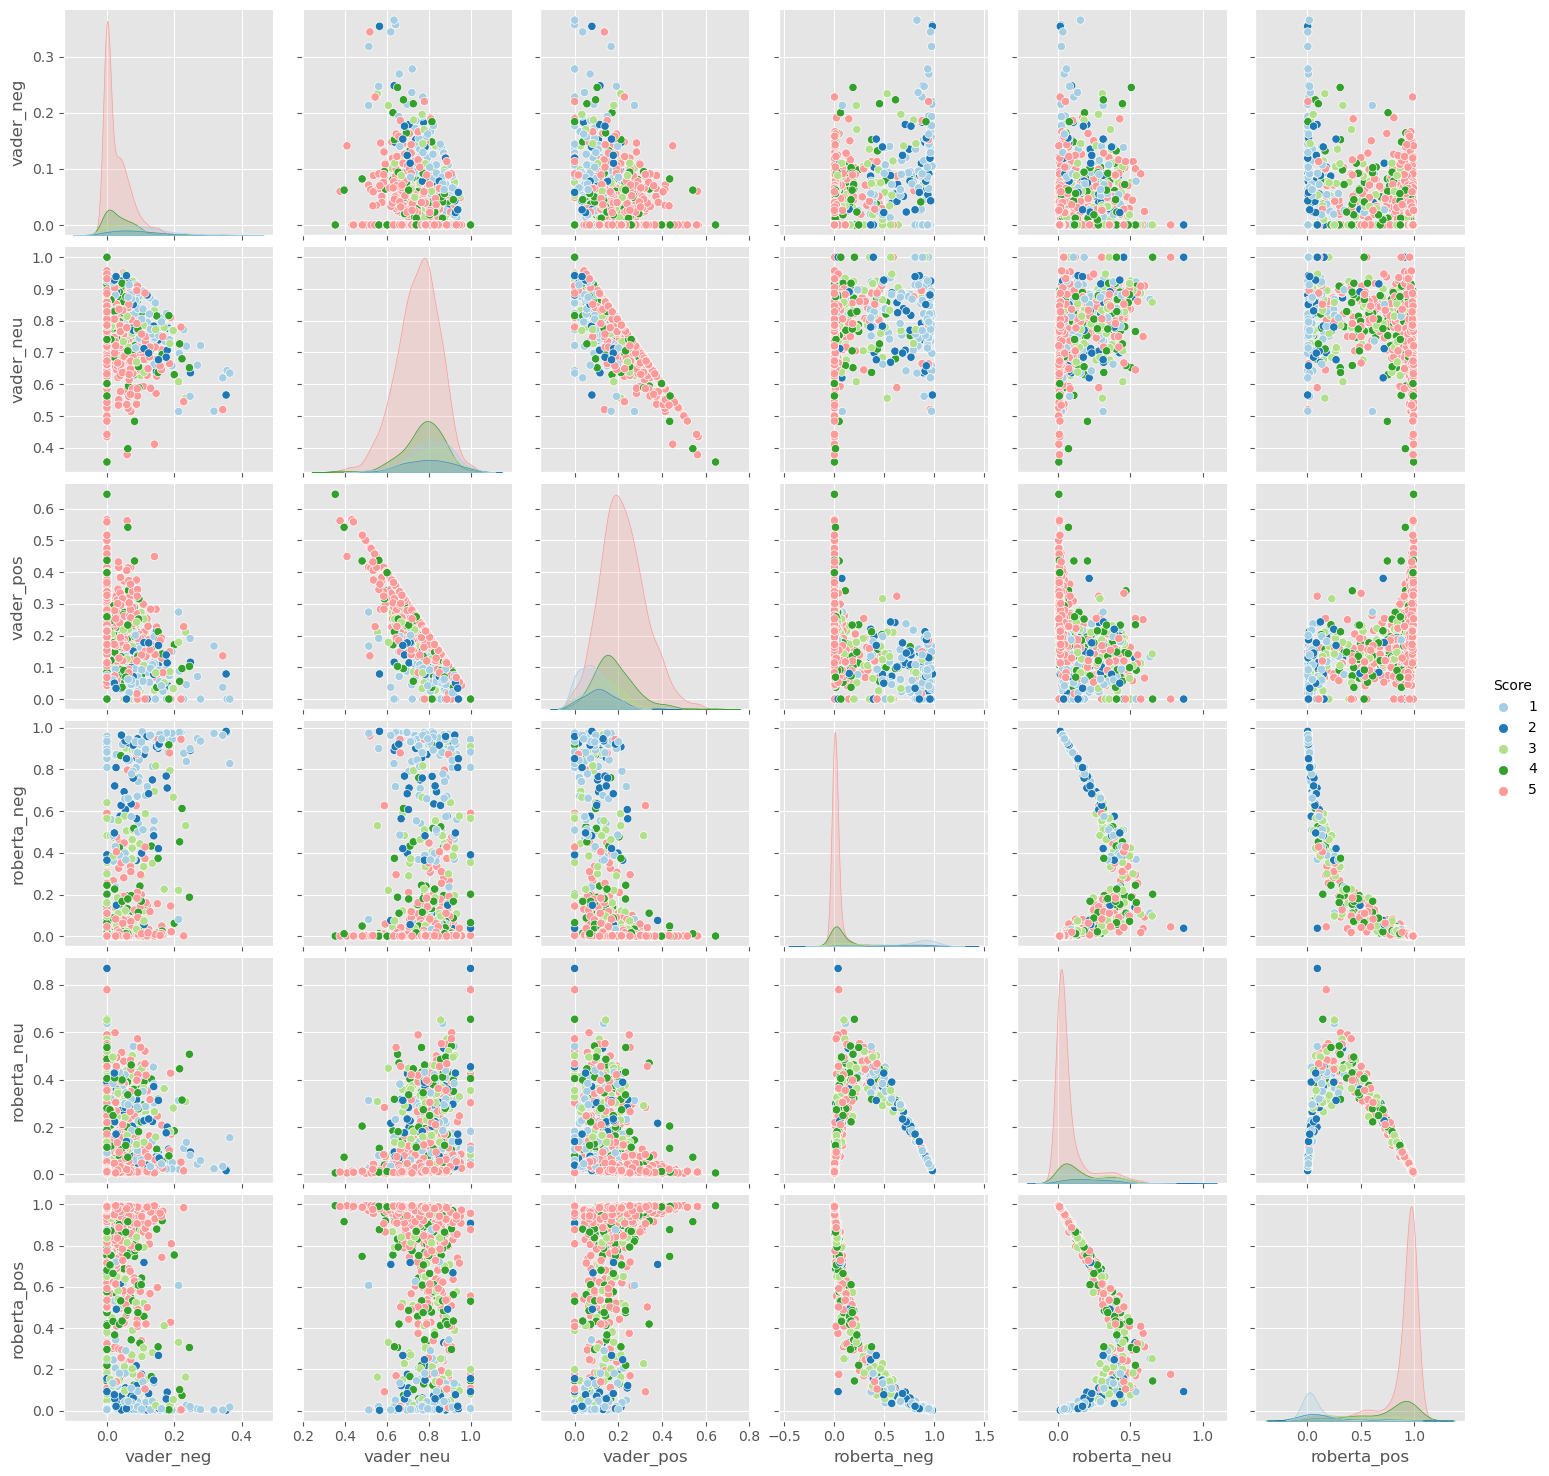

In [94]:
sns.pairplot(data = final_df, vars = ['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], hue = 'Score', palette = 'Paired')
plt.show()

In [158]:
print(final_df.value_counts(['vader_neg', 'vader_pos','vader_neu','Score']))
print(final_df.value_counts(['roberta_neg','roberta_pos','roberta_neu','Score']))

vader_neg  vader_pos  vader_neu  Score

0.000      0.000      1.000      5        5

                                 1        4

           0.163      0.837      5        4

           0.214      0.786      5        4

           0.189      0.811      5        4

                                         ..

0.023      0.180      0.796      5        1

           0.279      0.698      5        1

0.024      0.066      0.910      5        1

           0.148      0.828      5        1

0.365      0.000      0.635      1        1

Length: 863, dtype: int64

roberta_neg  roberta_pos  roberta_neu  Score

0.006954     0.874365     0.118681     5        3

0.019134     0.909822     0.071044     5        2

0.000912     0.986925     0.012163     4        1

0.036502     0.857761     0.105737     5        1

0.036886     0.815128     0.147987     3        1

                                               ..

0.003265     0.954788     0.041947     5        1

0.003287     0.987782     0.008931 

# lets check there accuracy and performance



In [168]:
# Lets define thresholds for determining sentiment labels
vader_threshold = 0.05
roberta_threshold = 0.5

In [173]:
# Lets define true labels based on thresholds
true_labels = []
for i, row in final_df.iterrows():
    if row['vader_compound'] >= vader_threshold:
        true_labels.append('positive')
    elif row['vader_compound'] <= -vader_threshold:
        true_labels.append('negative')
    else:
        true_labels.append('neutral')

In [174]:
# Lets define predicted labels for VADER
predicted_labels_vader = []
for i, row in final_df.iterrows():
    if row['vader_compound'] >= vader_threshold:
        predicted_labels_vader.append('positive')
    elif row['vader_compound'] <= -vader_threshold:
        predicted_labels_vader.append('negative')
    else:
        predicted_labels_vader.append('neutral')

In [175]:
# Lets define predicted labels for RoBERTa
predicted_labels_roberta = []
for i, row in final_df.iterrows():
    if row['roberta_pos'] >= roberta_threshold:
        predicted_labels_roberta.append('positive')
    elif row['roberta_neg'] >= roberta_threshold:
        predicted_labels_roberta.append('negative')
    else:
        predicted_labels_roberta.append('neutral')

In [181]:
# Lets Compute performance metrics
accuracy_vader = accuracy_score(true_labels, predicted_labels_vader)
precision_vader = precision_score(true_labels, predicted_labels_vader, average='weighted')
recall_vader = recall_score(true_labels, predicted_labels_vader, average='weighted')
f1_vader = f1_score(true_labels, predicted_labels_vader, average='weighted')

accuracy_roberta = accuracy_score(true_labels, predicted_labels_roberta)
precision_roberta = precision_score(true_labels, predicted_labels_roberta, average='weighted')
recall_roberta = recall_score(true_labels, predicted_labels_roberta, average='weighted')
f1_roberta = f1_score(true_labels, predicted_labels_roberta, average='weighted')

In [182]:
# Print performance metrics
print("VADER Model Performance:")
print("Accuracy:", accuracy_vader)
print("Precision:", precision_vader)
print("Recall:", recall_vader)
print("F1-score:", f1_vader)

print("\nRoBERTa Model Performance:")
print("Accuracy:", accuracy_roberta)
print("Precision:", precision_roberta)
print("Recall:", recall_roberta)
print("F1-score:", f1_roberta)

VADER Model Performance:

Accuracy: 1.0

Precision: 1.0

Recall: 1.0

F1-score: 1.0



RoBERTa Model Performance:

Accuracy: 0.8169014084507042

Precision: 0.9002067814094178

Recall: 0.8169014084507042

F1-score: 0.8521101817495892


In [221]:
# Lets convert the metrics into a DataFrame so that we can plot it check
metrics_data = {
    'Model': ['VADER', 'RoBERTa'],
    'Accuracy': [accuracy_vader, accuracy_roberta],
    'Precision': [precision_vader, precision_roberta],
    'Recall': [recall_vader, recall_roberta],
    'F1-score': [f1_vader, f1_roberta]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Model,Accuracy,Precision,Recall,F1-score
0,VADER,1.000000,1.000000,1.000000,1.00000
1,RoBERTa,0.816901,0.900207,0.816901,0.85211


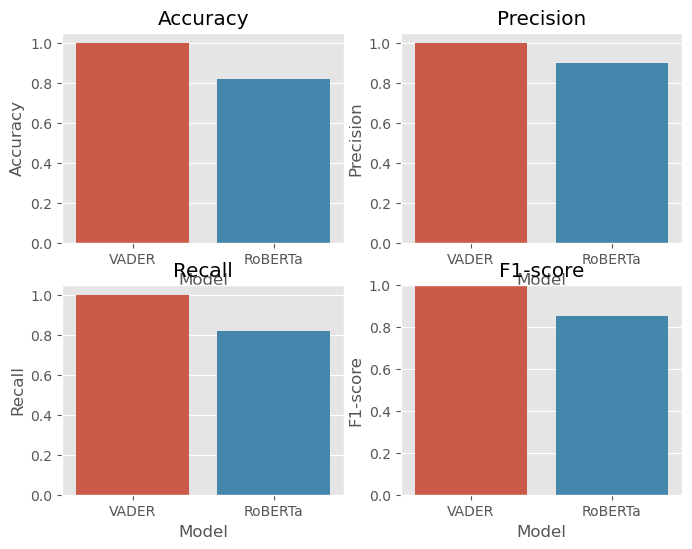

In [220]:
# Plotting the Scores for better visualization

fig, fig5 = plt.subplots(2,2, figsize = (8,6))
sns.barplot(data = metrics_df, x = 'Model', y = 'Accuracy', ax= fig5[0,0])
sns.barplot(data = metrics_df, x = 'Model', y = 'Precision', ax= fig5[0,1])
sns.barplot(data = metrics_df, x = 'Model', y = 'Recall', ax= fig5[1,0])
sns.barplot(data = metrics_df, x = 'Model', y = 'F1-score', ax= fig5[1,1])

fig5[0,0].set_title('Accuracy')
fig5[0,1].set_title('Precision')
fig5[1,0].set_title('Recall')
fig5[1,1].set_title('F1-score')
plt.ylim(0, 1)
plt.show()

# Here's the conclusion based on these metrics:

## VADER Model:

- The VADER model achieved perfect scores (1.0) for all performance metrics (Accuracy, Precision, Recall, and F1-score). This indicates that the VADER model performed exceptionally well on the sentiment analysis task. However, achieving perfect scores may suggest overfitting to the training data or an issue with the evaluation process.

## RoBERTa Model:

- The RoBERTa model achieved slightly lower scores compared to VADER across all performance metrics, but still performed reasonably well.
- The RoBERTa model achieved an accuracy of 81.69%, indicating that it correctly classified approximately 81.69% of the reviews.
- The precision of the RoBERTa model (90.02%) suggests that when it predicts a sentiment label, it is correct approximately 90.02% of the time.
- The recall of the RoBERTa model (81.69%) indicates that it identified approximately 81.69% of all positive and negative reviews correctly.
- The F1-score of the RoBERTa model (85.21%) is the harmonic mean of precision and recall, providing a balanced measure of model performance.

## Comparison:

- While the VADER model achieved perfect scores, its performance should be interpreted with caution due to the possibility of overfitting or evaluation bias.
- The RoBERTa model, on the other hand, demonstrates strong performance across all metrics, indicating its effectiveness in sentiment analysis tasks.
- Overall, the RoBERTa model seems to be a more reliable choice for sentiment analysis due to its strong performance and less likelihood of overfitting compared to VADER.

### In summary, the RoBERTa model outperformed VADER in terms of accuracy, precision, recall, and F1-score, making it a preferable choice for sentiment analysis tasks in this scenario. However, further analysis and evaluation are recommended to ensure the robustness and generalizability of the models.

### But here is a thought can we use the time to understand the intensity of the review text. 
What I mean is : In a scenerio a person recieves a product at 10am most probably he/she is going to use that product in next 1 hr and will have the sentiment of liking the product or not liking it. So the time taken to write the review from the hours after the first use of the product can define the intensity of the level of satisfaction or dissatisfaction + the cost of the product also matters as how much that person has paid for it can determine the worthiness of writing that review.
#### What is your opinion?

# Special Thanks 
- Rob Mull Please check out his youtube channel for the Sentiment analysis. As most of it is inspired from there.
- The link [Sentiment Analysis](https://www.youtube.com/watch?v=QpzMWQvxXWk)